# Probability in torch 

In [14]:
import torch
import random
import matplotlib.pyplot as plt
from torch.distributions.multinomial import Multinomial

print(f'torch version is : {torch.__version__}')

torch version is : 1.11.0+cpu


In [11]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print(f'heads are : {heads}, tails are : {tails}')

heads are : 49, tails are : 51


In [12]:
# Using Multinomial 
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([52., 48.])

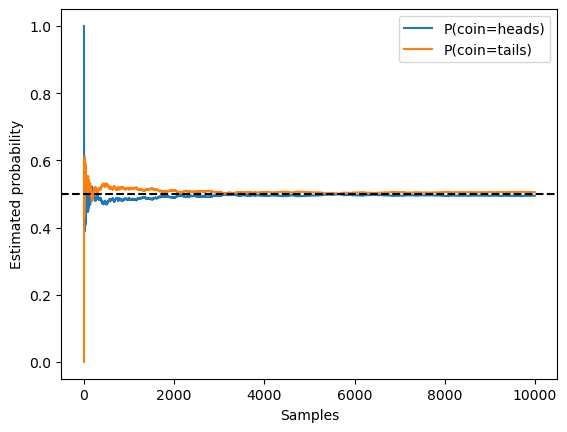

In [17]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')

plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend();